# Prise en main de Python, implémentation d'un perceptron une couche, introduction à Keras

L'objectif est d'apprendre à prendre en main Keras

## Exercice 1 : prise en main du langage

### a : Manipulation de listes

In [2]:
animaux = ['girafe', 'tigre', 'singe', 'souris']

#affiche chacun des éléments de la liste

print('Les éléments de la liste animaux : ')
for x in animaux:
    print(x)
print ('\n')

Les éléments de la liste animaux : 
girafe
tigre
singe
souris




In [5]:
# Ajoute un 'chien' à la fin de la liste

animaux.append('chien')

print(animaux)

['girafe', 'tigre', 'singe', 'souris', 'chien']


In [9]:
# Ajoute un 'chat' au tout début de la liste

animaux.insert(0,'chat')
print(animaux)

['chat', 'girafe', 'tigre', 'singe', 'souris', 'chien']


In [16]:
# Affiche chaque animal et son indice correspondant

compteur = 0;

for i in range(len(animaux)):
    print(f"l'animal {i} est un {animaux[i]}")


l'animal 0 est un chat
l'animal 1 est un girafe
l'animal 2 est un tigre
l'animal 3 est un singe
l'animal 4 est un souris
l'animal 5 est un chien


In [15]:
# Affiche le nombre de chiens qu'il y a dans la liste

print(f"Il y a {animaux.count('chien')} chiens dans la liste.")

Il y a 1 chiens dans la liste.


In [18]:
# Affiche les animaux pour les indices allant de 1 à 3 (inclus)

print("solution")
for animal in animaux[1:4]:
    print(animal)
    
print("\n solution 2")
for i in range(1,4):
    print(animaux[i])

solution
girafe
tigre
singe

 solution 2
girafe
tigre
singe


### b. Création de classes

In [19]:
# Création d'une classe Citron
class Citron:
    # Création du constructeur, la variable self fait référence aux attributs d'instance
    def __init__(self, couleur):
        self.couleur = couleur


# Instanciation d'un objet Citron, ayant pour "couleur" la valeur jaune
citron1 = Citron("jaune")

# Affiche la couleur du citron créé
print(citron1.couleur)

jaune


In [31]:
class Citron:
    forme = "ellipsoïde"  # attribut de classe
    saveur = "acide"  # attribut de classe

    def __init__(self, couleur="jaune", taille="standard", masse=200):
        self.couleur = couleur  # attribut d'instance
        self.taille = taille  # attribut d'instance
        self.masse = masse  # attribut d'instance (masse en gramme)

    # Créer une méthode augmenter_masse(valeur) permettant d'augmenter la masse du citron
    
    def augmenter_masse(self, valeur):
        self.masse += valeur
    
    def description(self):
        return (f'{self.forme}, {self.saveur}, {self.couleur}, {self.taille}, {self.masse}' ) 

citron2 = Citron()
print("Attributs de classe :", citron2.forme, citron2.saveur, citron2.couleur)

# Affiche l'ensemble des attributs d'instance de citron2
print(citron2.description())

# Augmente de 100g la masse de citron2
citron2.augmenter_masse(100)


# Affiche les attributs d'instance de citron2
print(citron2.description())

Attributs de classe : ellipsoïde acide jaune
ellipsoïde, acide, jaune, standard, 200
ellipsoïde, acide, jaune, standard, 300


## Exercice 2 : Implémentation de la classe Perceptron




### a. Introduction à NumPy

[NumPy](https://numpy.org) est une librairie Python destinée à la manipulation des matrices et de tableaux multidimensionnels, fournissant les fonctions mathématiques nécessaires à la manipulation de ces objets.

NumPy est le socle technique de très nombreuses librairies de l'écosystème Python, notamment scikit-learn.

In [45]:
from tqdm import trange

# Import des modules python utiles aux applications d'apprentissage automatique
# Import des bibliothèques suivantes : 
# - NumPy sous le nom "np"
# - pyplot de matplotlib sous le nom "plt"
# - pandas sous le nom "pd"

import platform

print(f"Python version: {platform.python_version()}")
assert platform.python_version_tuple() >= ("3", "6")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(f"NumPy version: {np.__version__}")

Python version: 3.8.5
NumPy version: 1.19.2


In [50]:
# Création d'un tableau NumPy à une dimension (un vecteur)
v = np.array([0, 2, 4])

print(v)

[0 2 4]


In [52]:
# Création de z, un tableau NumPy tel que z=[[1,2,3],[4,5,6]]
z = np.array([[1,2,3], [4,5,6]])

print(z)

[[1 2 3]
 [4 5 6]]


In [54]:
# Affiche les formes de z et v
print(z.shape)
print(v.shape)

(2, 3)
(3,)


In [55]:
# Affiche z multiplié par 2
print(z*2)

[[ 2  4  6]
 [ 8 10 12]]


In [56]:
# Affiche la somme de z et v
print(z+v)

[[ 1  4  7]
 [ 4  7 10]]


In [58]:
# Afficher le produit matriciel (dot product) de z et v
print(z*v)

print(z  v)

[[ 0  4 12]
 [ 0 10 24]]


In [61]:
# Setup plots
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 8
%config InlineBackend.figure_format = "retina"

### b. Création et prise en main du jeu de données : utilisation de pandas


In [99]:
# Fonction qui génère des groupes de points proches
def make_clusters(
    n_points=200,
    n_cluster=2,
    n_dimensions=2,
    classes=["A", "B"],
    locs=[(20, 25), (32, 15)],
    sigmas=[4, 4],
    balance=[1, 1],
    seed=None,
):
    """
    n_points :
    n_cluster :
    n_dimensions : 
    classes :
    locs : 
    sigmas :
    balance : 
    seed :
    """

    rs = np.random.RandomState(seed)
    X = []
    y = []
    for n in range(n_cluster):
        size = int(np.round(balance[n] * n_points))
        cluster = np.zeros((size, n_dimensions))
        for i in range(n_dimensions):
            cluster[:, i] = rs.normal(locs[n][i], sigmas[n], size=size)

        X.append(cluster)
        y.extend([classes[n] for _ in range(size)])

    return np.vstack(X), np.array(y)

In [100]:
classes = ["A", "B"]
X, labels = make_clusters(classes=classes)
y = np.array([classes.index(lbl) for lbl in labels])

# Affiche les labels y (résultats attendus)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [101]:
# On normalise les données contenues dans la variable X
X = (X - X.min()) / (X.max() - X.min())

In [102]:
# Affiche les formes (shapes) des données X et des labels y. Vérifier la cohérence des résultats obtenus
print(X.shape)
print(y.shape)

(400, 2)
(400,)


#### Utilisation de pandas

In [103]:
data = np.column_stack([X,y])
df_x = pd.DataFrame(data, columns=["valeur x", "valeur y", "classe"])

# Affiche les 5 premières valeurs du Dataframe

df_x.head()

,valeur x,valeur y,classe
0,0.427126,0.649796,0.0
1,0.445862,0.700364,0.0
2,0.347191,0.415580,0.0
3,0.361764,0.311359,0.0
4,0.605238,0.538527,0.0


In [104]:
# Affiche 8 valeurs au hasard du DataFrame
df_x.sample(9)

,valeur x,valeur y,classe
256,0.667963,0.100966,1.0
362,0.810937,0.353261,1.0
329,0.935355,0.365980,1.0
374,0.746968,0.051870,1.0
78,0.448866,0.640034,0.0
143,0.366408,0.466548,0.0
365,0.780080,0.311241,1.0
95,0.624758,0.703749,0.0
317,0.741008,0.447292,1.0


In [105]:
# Affiche un résumé du DF
df_x.describe

<bound method NDFrame.describe of      valeur x  valeur y  classe
0    0.427126  0.649796     0.0
1    0.445862  0.700364     0.0
2    0.347191  0.415580     0.0
3    0.361764  0.311359     0.0
4    0.605238  0.538527     0.0
..        ...       ...     ...
395  0.764552  0.429150     1.0
396  0.745691  0.223499     1.0
397  0.890143  0.343793     1.0
398  0.625471  0.316615     1.0
399  0.753588  0.358049     1.0

[400 rows x 3 columns]>

In [107]:
# Les lignes ci-dessous créent des variables classX permettant de récupérer les données du dataframe 
# associées resp. aux classes 1 et 2, tout en supprimant les valeurs nulles. 
class1 = df_x.where(df_x['classe']==1).dropna()
class0 = df_x.where(df_x['classe']==0).dropna()

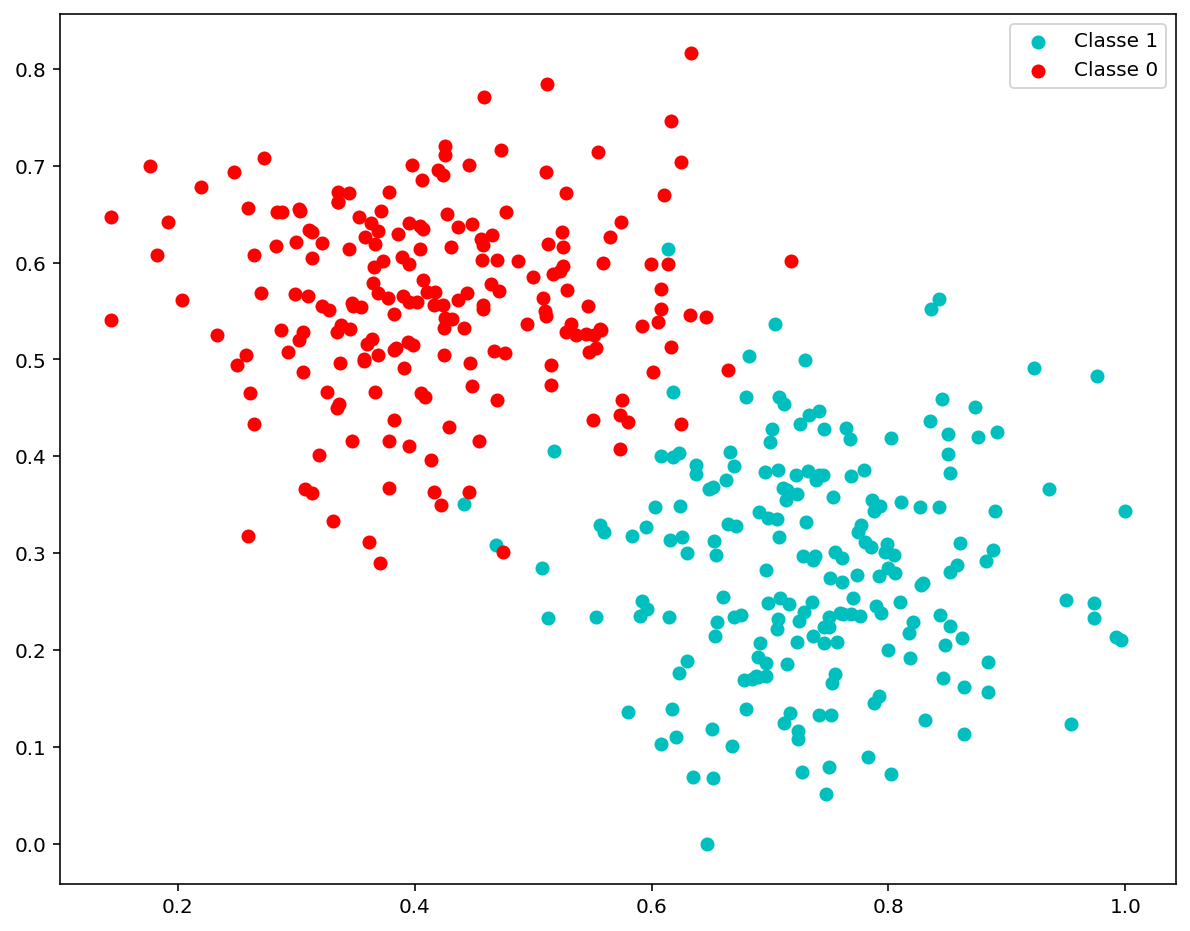

In [108]:
# On affiche les données avec leur classe
plt.scatter(class1['valeur x'], class1['valeur y'], color='c', label="Classe 1" )
plt.scatter(class0['valeur x'], class0['valeur y'], color='r', label="Classe 0" )
plt.legend()
plt.show()

### c. Implémentation du perceptron

In [110]:
def heaviside(x):
    # Fonction seuil
    # if x <= 0:
    #     return 0.0
    # return 1.0
    return np.where(x < 0, 0.0, 1.0)


def sigmoid(x):
    # la fonction sigmoïde (utiliser np.exp())
    return 1/(1+np.exp(-x))


def tanh(x):
    # la fonction tangente hyperbolique
    return tanh(x)
    

In [116]:
class Perceptron:
    """
        La classe Perceptron contient les méthodes nécessaires 
        à la création d'un algorithme de perceptron à une couche. Elle
        possède les paramètres :
        
        input_dim : taille de la dimension des données d'entrées
        activation_fn : fonction d'activation apliquée à la sortie du neurone
        learning_rate : coefficient d'apprentissage utilisé pour la modification des poids
        threashold : seuil utilisé pour la classification
    """

    def __init__(
        self, input_dim=2, activation_fn=sigmoid, learning_rate=0.01, threshold=0.5,
    ):

        # Mémorise les paramètres du constructeur dans des attributs
        self.input_dim=input_dim
        self.activation_fn=activation_fn
        self.learning_rate=learning_rate
        self.threshold=threshold

        # Initialissation des poids et du terme de biais
        self.weights = np.random.uniform(size=input_dim)
        self.bias = np.random.uniform(size=1)

    def predict(self, inputs):
        # Calcule et renvoie la sortie du perceptron = somme des entrées pondérées par les poids + biais
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.activation_fn(weighted_sum)

    def predict_class(self, inputs):
        # Renvoie la classe des entrées (0 ou 1)
        prediction = self.predict(inputs)
        return np.where(prediction < self.threshold, 0, 1)

    def train(self, x, y, epochs=10):
        # Pour chaque itération
        for _ in trange(epochs):
            # Pour chaque entrée associée à sa sortie
            for inputs, label in zip(x, y):
                assert inputs.shape == (self.input_dim,)

                # Calcule la prédiction du modèle
                prediction=self.predict(inputs)

                # Calcule l'erreur (sortie attendue - sortie réelle)
                erreur = label-prediction

                # Met à jour les poids et le biais
                # poids= poid + learning_rate*(Y.X)
                self.weights+= self.learning_rate*erreur*inputs
                self.bias += self.learning_rate* erreur * 1.0

    def evaluate(self, x, y):
        # Calcul de la justesse (accuracy) = % de bonnes prédictions
        predicted_classes = self.predict_class(x)
        accuracy = np.sum(predicted_classes == y) / y.size
        return accuracy

### d. Test du perceptron

In [117]:
# Affiche les données et la frontière de décision du modèle
def plot_training(model, X, y, n_points=100):
    mesh_x1, mesh_x2 = np.meshgrid(
        np.linspace(X[:, 0].min(), X[:, 0].max(), n_points),
        np.linspace(X[:, 1].min(), X[:, 1].max(), n_points),
    )

    mesh_response = []
    for x1, x2 in zip(mesh_x1.ravel(), mesh_x2.ravel()):
        mesh_response.append(model.predict_class([x1, x2]))

    mesh_response = np.array(mesh_response).reshape(n_points, n_points)

    plt.contourf(mesh_x1, mesh_x2, mesh_response)
    plt.scatter(X[:, 0], X[:, 1])

In [127]:
# Perceptron avec 2 entrées et la fonction d'activation seuil
model1 = Perceptron(input_dim=2, activation_fn=heaviside)

# Entraine le perceptron sur le jeu de données pendant 100 itérations
model1.train(X,y,epochs=100)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 47.09it/s]


[ 0.41476993 -0.26827079] [-0.08414525]
Accuracy: 0.9325


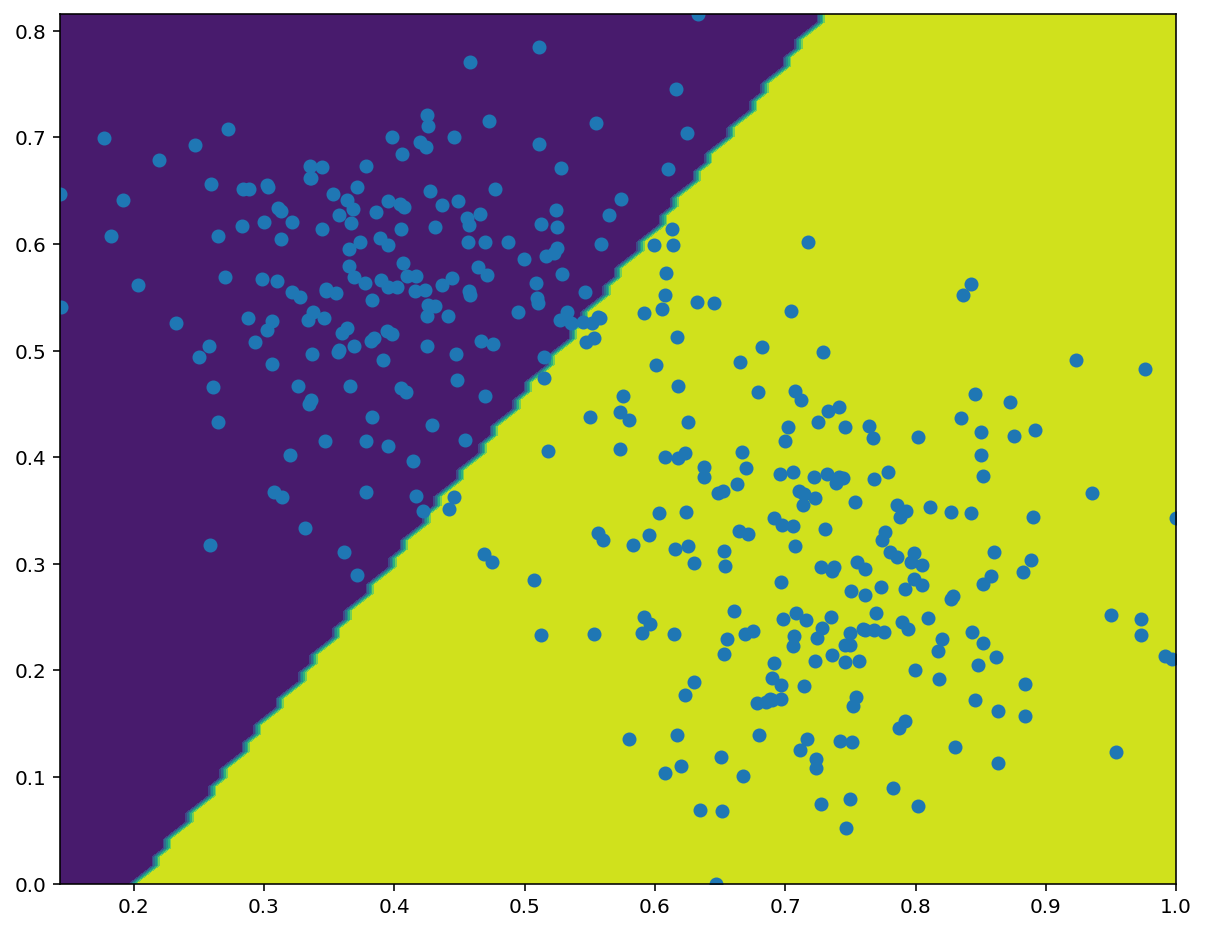

In [128]:
def show_results(model, x, y):
    print(model.weights, model.bias)
    print(f"Accuracy: {model.evaluate(x, y)}")

    plot_training(model, x, y)


# Affiche les résultats du perceptron
show_results(model1, X, y)

In [124]:

# Crée un perceptron avec 2 entrées et la fonction d'activation seuil
model2 = Perceptron(input_dim=2, activation_fn=sigmoid)

# Entraine le perceptron sur le jeu de données pendant 100 itérations
model2.train(X,y,epochs=100)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 48.63it/s]


[ 8.91439059 -8.45362645] [-1.38506776]
Accuracy: 0.98


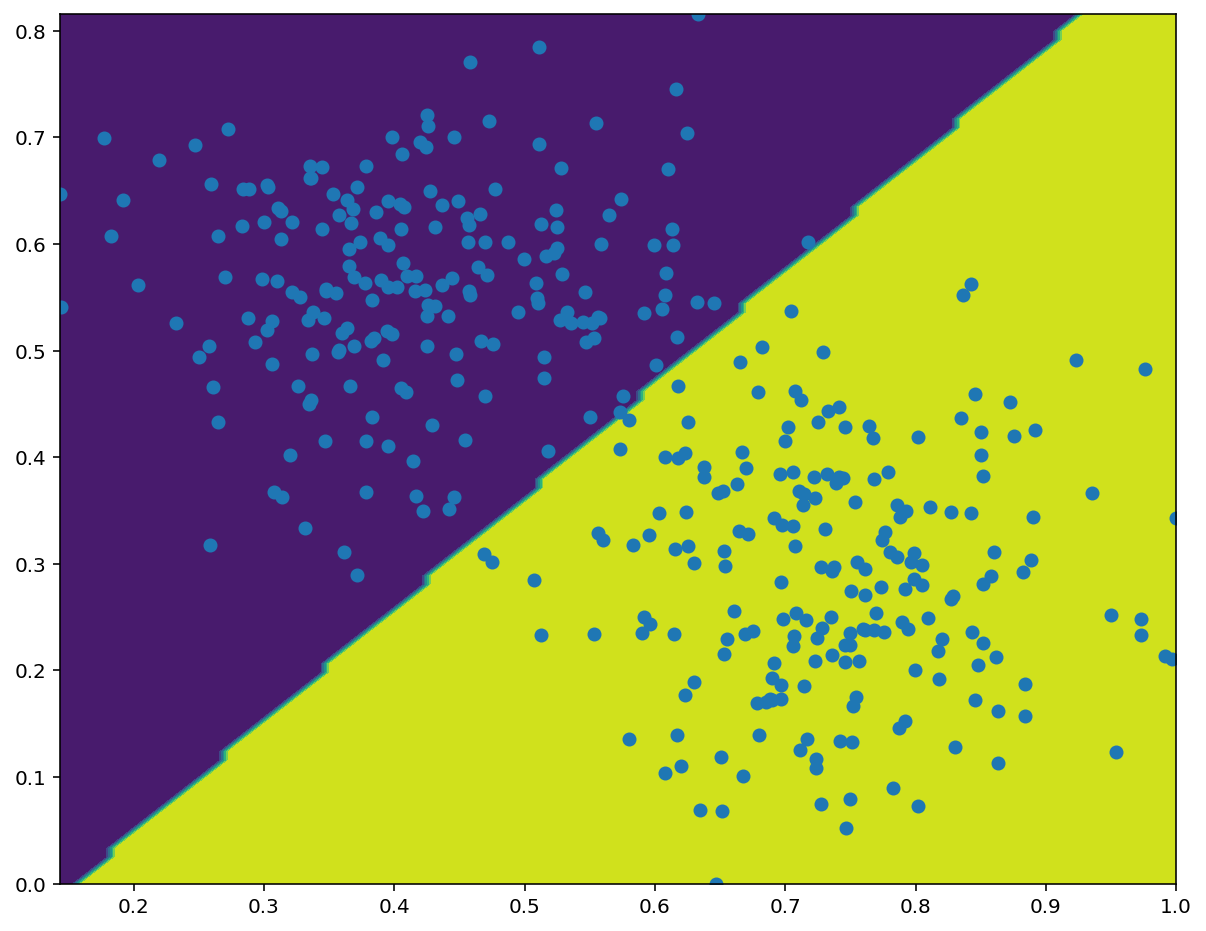

In [125]:
# Afficher les résultats du perceptron
show_results(model2, X, y)

## Exercice 3 : introduction à Keras

[Keras](https://keras.io/) est une API simple et efficace pour créer et entrainer des réseaux de neurones. En arrière-plan, les calculs sont réalisés par la librairie [TensorFlow](https://www.tensorflow.org/).

In [133]:
from matplotlib.colors import ListedColormap

# Pour générer des données avec scikit-learn
from sklearn.datasets import make_moons, make_circles

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [134]:
def plot_planar_data(X, y):
    """Plot some 2D data"""

    plt.figure()
    plt.plot(X[y == 0, 0], X[y == 0, 1], "or", alpha=0.5, label=0)
    plt.plot(X[y == 1, 0], X[y == 1, 1], "ob", alpha=0.5, label=1)
    plt.legend()


def plot_decision_boundary(pred_func, X, y, figure=None):
    """Plot a decision boundary"""

    if figure is None:  # Si il n'y a pas de figure, une nouvelle est crée
        plt.figure()
    # fixe les valeurs de min et max avec du padding
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01
    # Génère une grille de points avec une distance de h entre eux
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predie la veleur de la fonction de la grille entière
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # affiche le contour
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)


def plot_loss_acc(history):
    """Plot training and (optionally) validation loss and accuracy
    Takes a Keras History object as parameter"""

    loss = history.history["loss"]
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 10))

    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss, ".--", label="Training loss")
    final_loss = loss[-1]
    title = "Training loss: {:.4f}".format(final_loss)
    plt.ylabel("Loss")
    if "val_loss" in history.history:
        val_loss = history.history["val_loss"]
        plt.plot(epochs, val_loss, "o-", label="Validation loss")
        final_val_loss = val_loss[-1]
        title += ", Validation loss: {:.4f}".format(final_val_loss)
    plt.title(title)
    plt.legend()

    acc = history.history["accuracy"]

    plt.subplot(2, 1, 2)
    plt.plot(epochs, acc, ".--", label="Training acc")
    final_acc = acc[-1]
    title = "Training accuracy: {:.2f}%".format(final_acc * 100)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    if "val_accuracy" in history.history:
        val_acc = history.history["val_accuracy"]
        plt.plot(epochs, val_acc, "o-", label="Validation acc")
        final_val_acc = val_acc[-1]
        title += ", Validation accuracy: {:.2f}%".format(final_val_acc * 100)
    plt.title(title)
    plt.legend()

x_train: (1000, 2). y_train: (1000,)


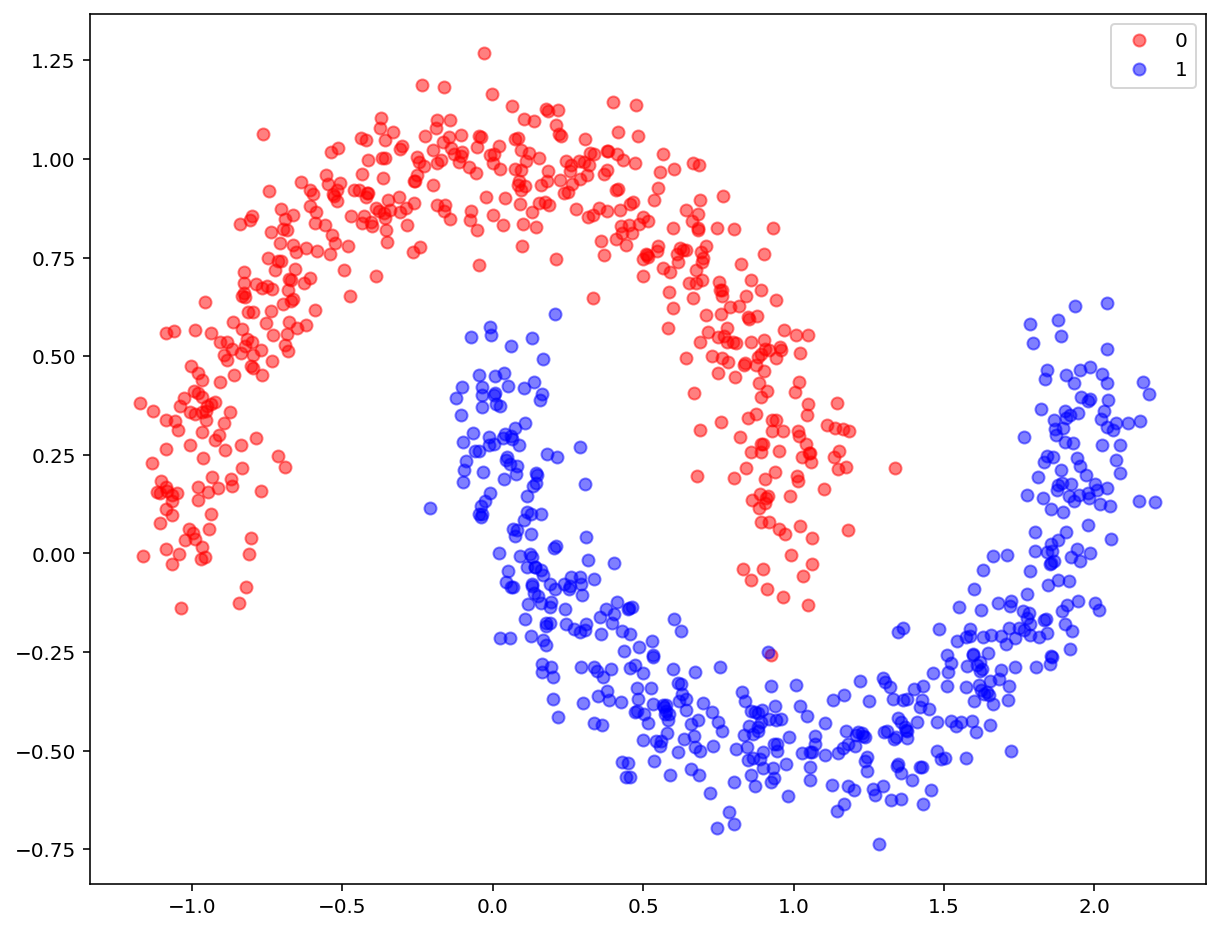

In [135]:
# On génère des demi-lunes pour faire de la classification binaire
x_train, y_train = make_moons(n_samples=1000, noise=0.10, random_state=0)

print(f"x_train: {x_train.shape}. y_train: {y_train.shape}")
plot_planar_data(x_train, y_train)

In [136]:
# Modèle séquentiel : empilement de couches
model = Sequential()

# Ajoute une couche cachée avec 3 neurones, tanh comme fonction d'activation et 2 entrées
model.add(Dense(units=3, activation="tanh", input_shape=(2,)))

# Ajoute une couche de sortie avec 1 neurone et une fonction sigmoide
model.add(Dense(1, activation="sigmoid"))

# Décrit le modèle
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [137]:
# Configuration de l'entrainement
model.compile(
    optimizer=SGD(learning_rate=1.0), loss="binary_crossentropy", metrics=["accuracy"]
)

# Entrainement du modèle pendant 40 itérations
history = model.fit(x_train, y_train, verbose=0, epochs=40)

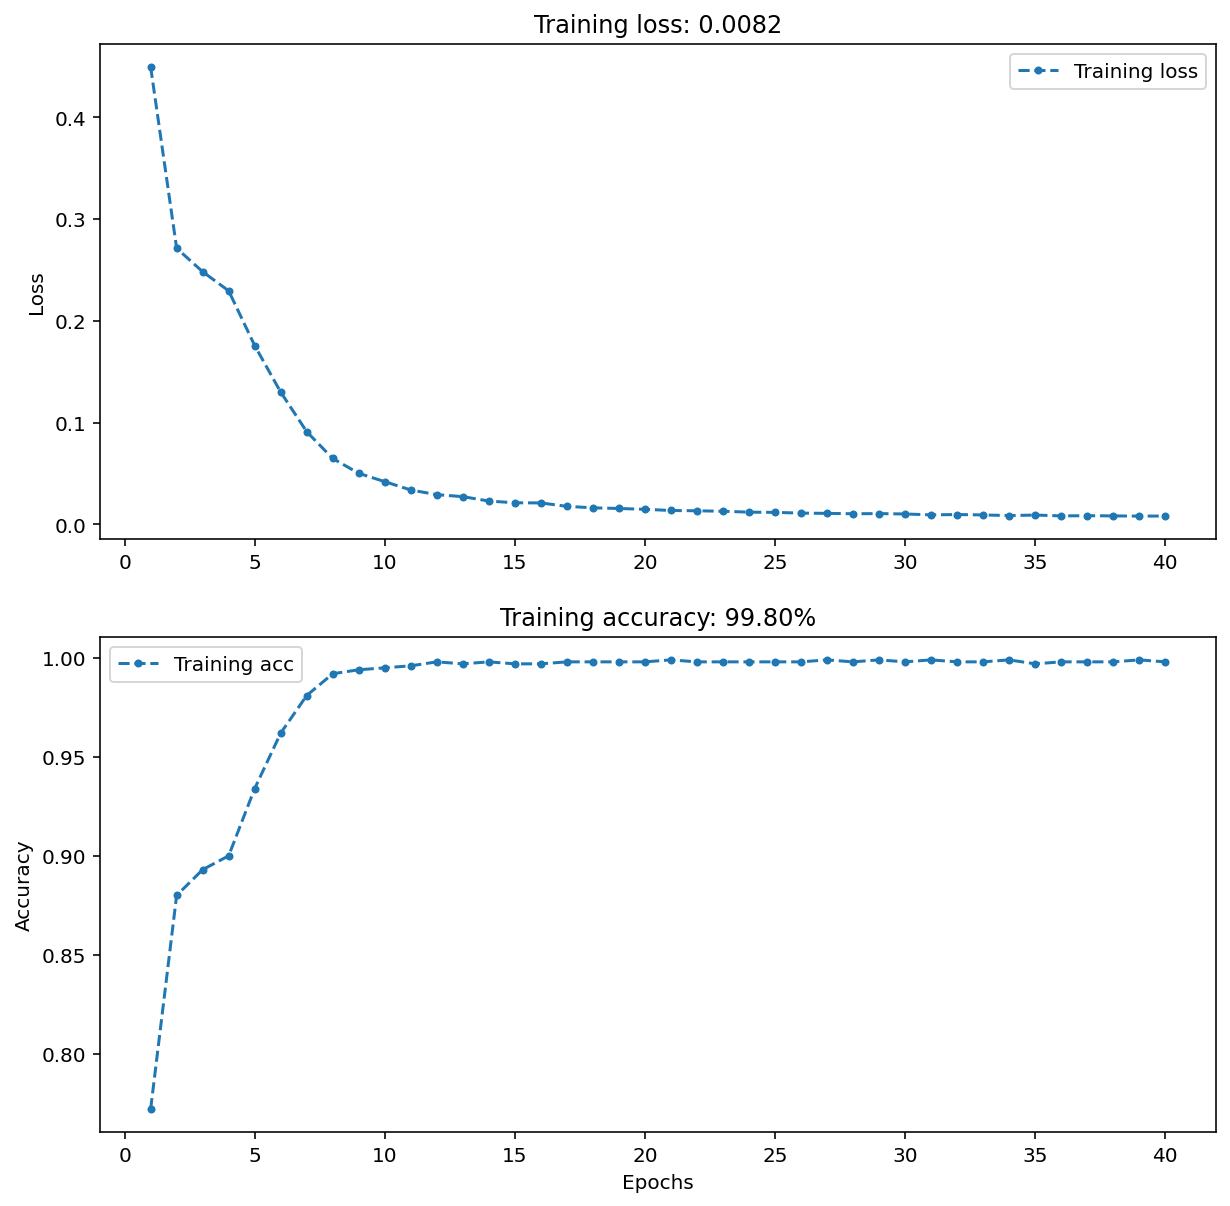

In [138]:
# Affichage de l'historique de l'entrainement
# Loss = mesure de l'erreur entre ce qui est attendu et observé
# Accuracy (justesse) = % de prédictions exactes
plot_loss_acc(history)

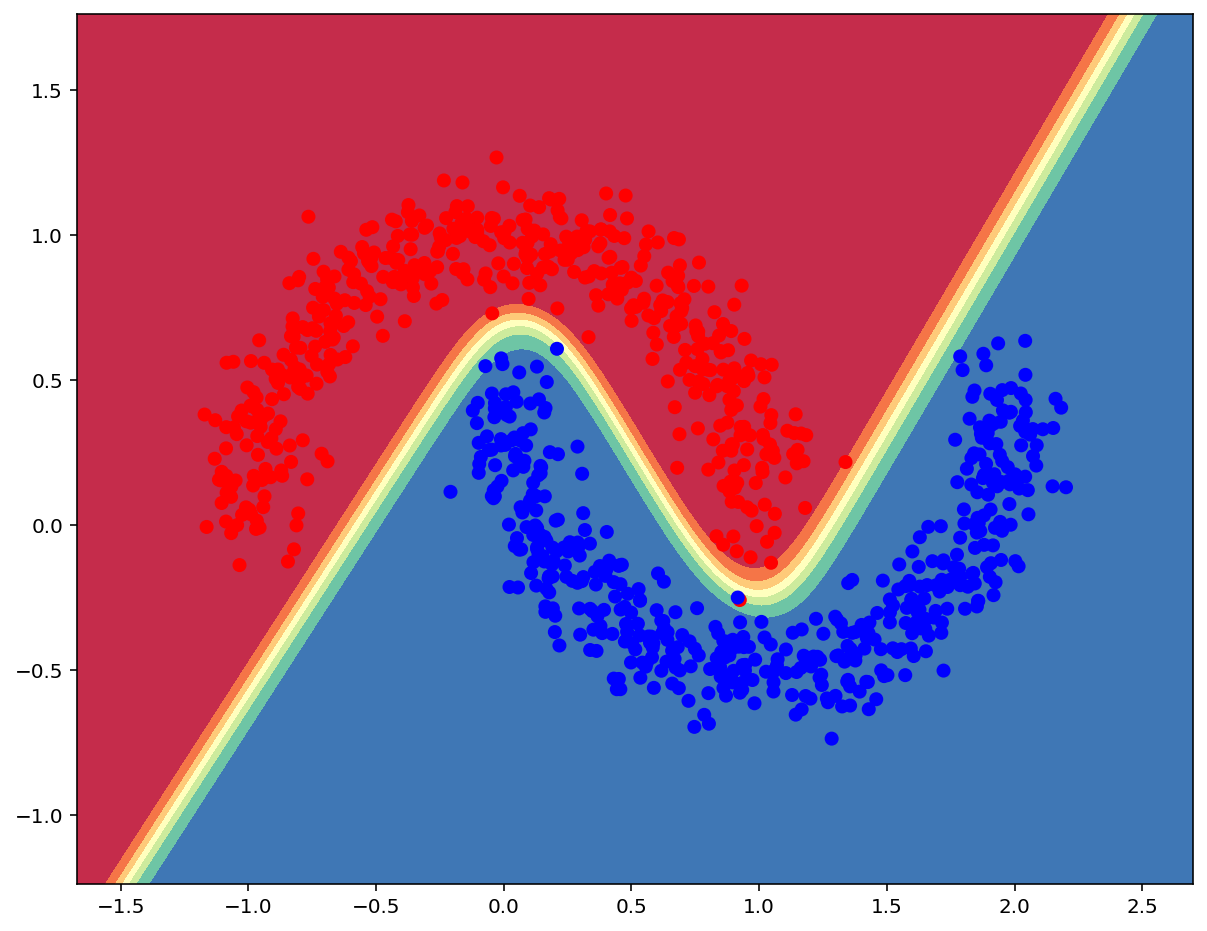

In [139]:
# Affiche la frontière de décision du modèle
plot_decision_boundary(lambda x: model.predict(x), x_train, y_train)

x_train: (1000, 2). y_train: (1000,)


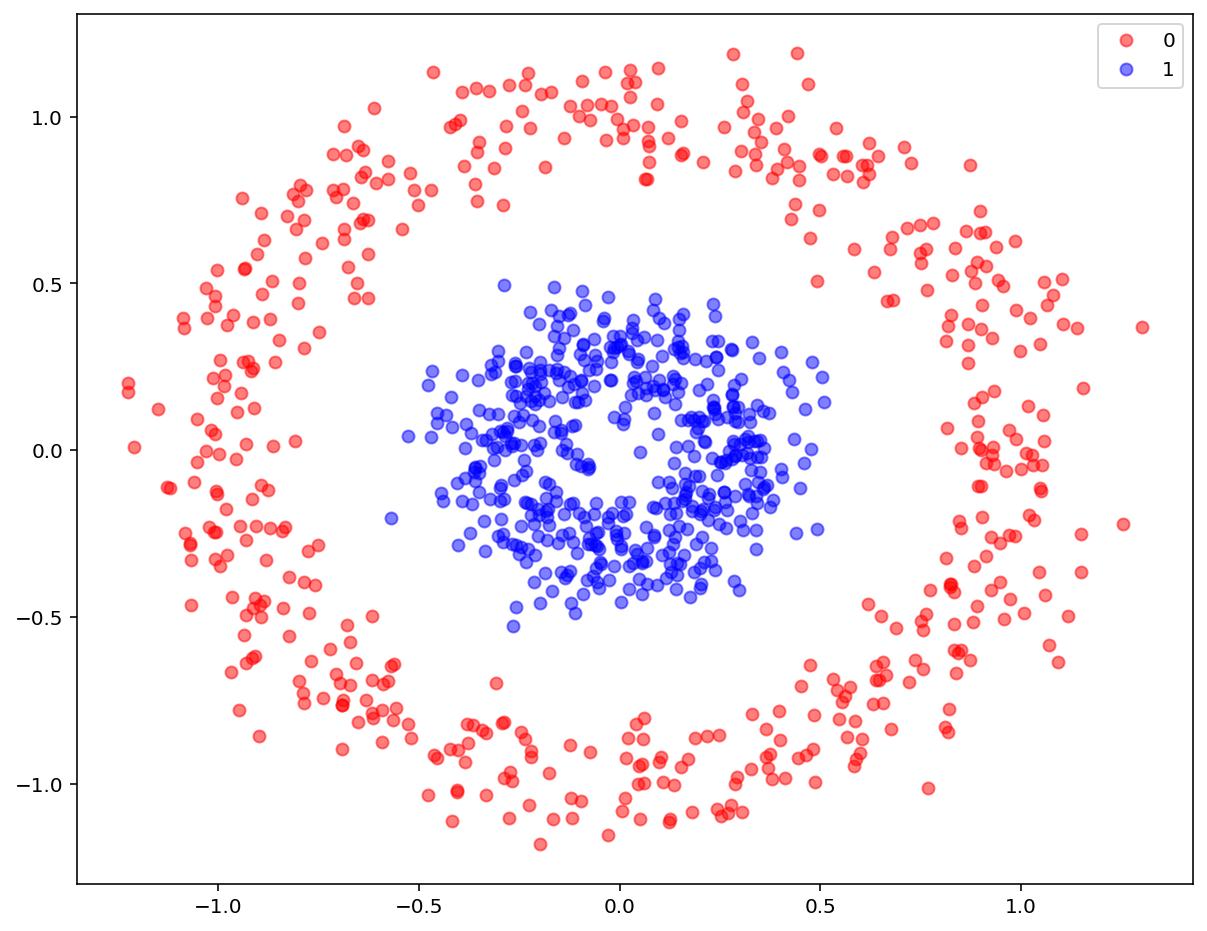

In [140]:
# Génération de données circulaires (donuts)
x_train, y_train = make_circles(n_samples=1000, noise=0.10, factor=0.3, random_state=0)

print(f"x_train: {x_train.shape}. y_train: {y_train.shape}")
plot_planar_data(x_train, y_train)

In [141]:
# Entraine le modèle actuel sur le jeu de données donuts
# Mémorise le résultat de l'entrainement dans la variable history
history2 = model.fit(x_train, y_train, verbose=0, epochs=40)

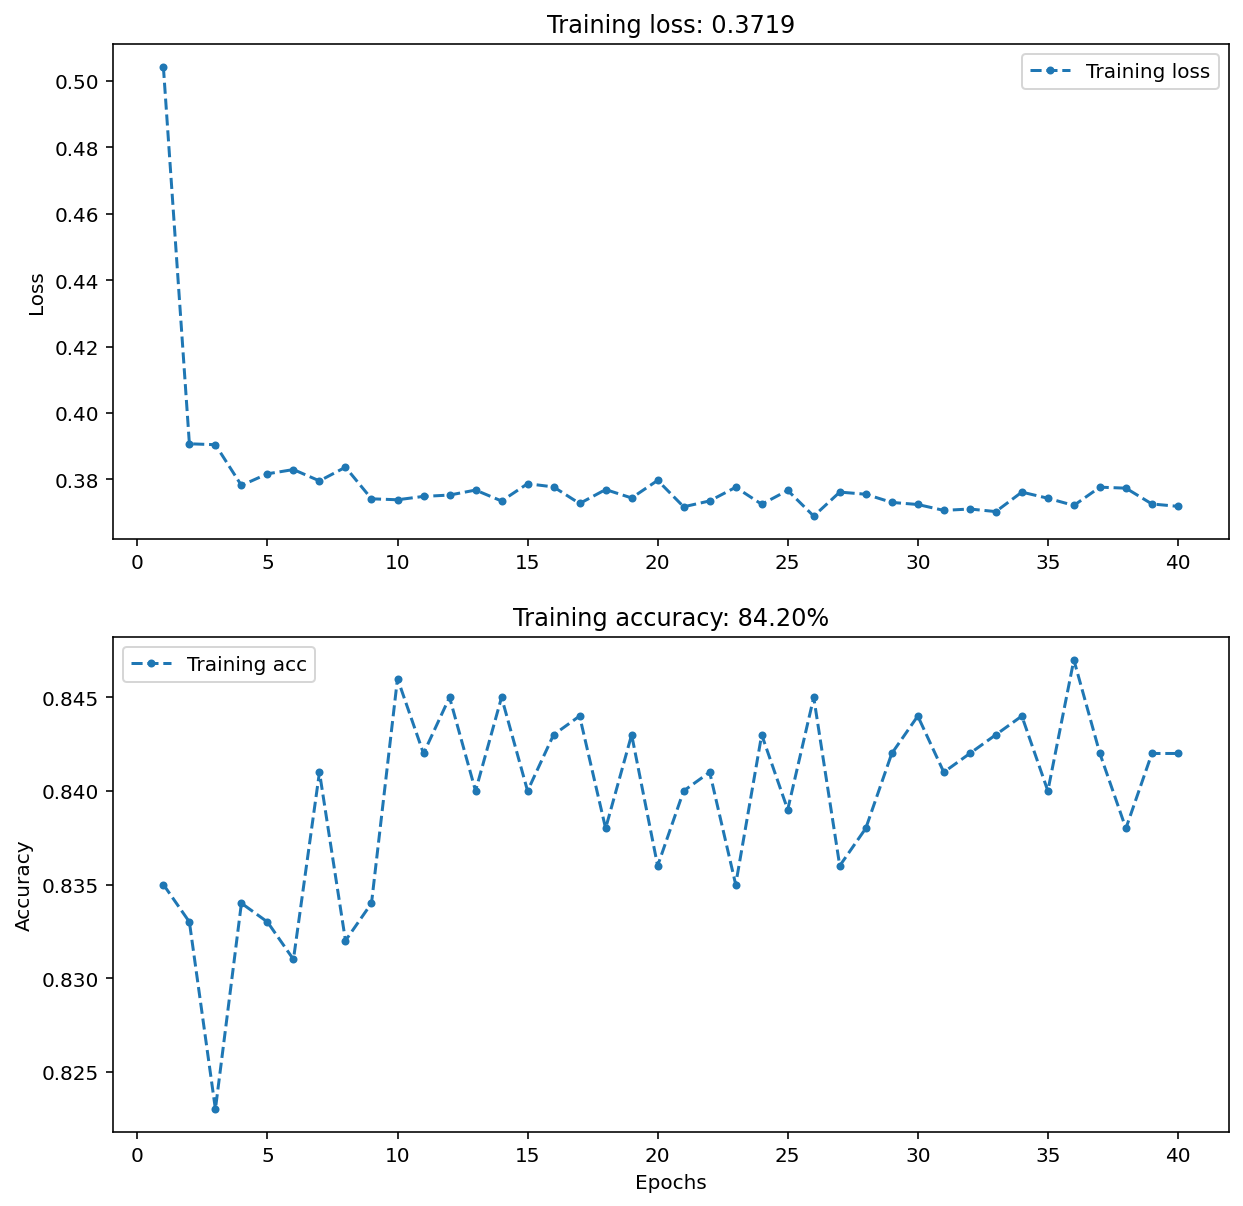

In [142]:
# Affichage de l'historique de l'entrainement
plot_loss_acc(history2)

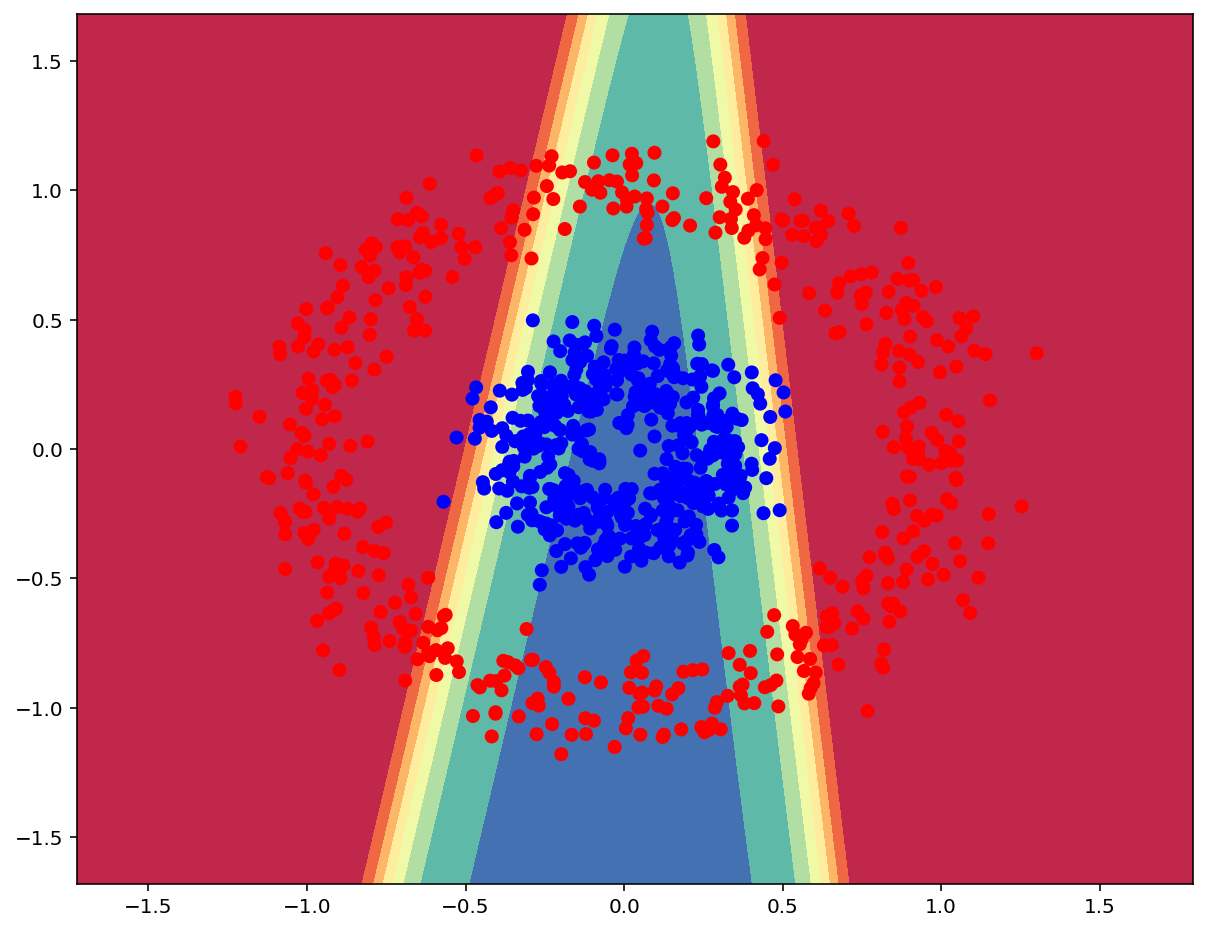

In [143]:
# Affiche la frontière de décision du modèle
plot_decision_boundary(lambda x: model.predict(x), x_train, y_train)

On observe qu'un perceptron avec une couche cachée à 3 neurones ne suffit pas pour répondre à la problématique bidimensionnelle du donut. Rajouter une couche cachée permetrait au perceptron de différencier les points bleus des rouges avec une équation de séparation au carré (voir équation cartésienne du cercle).